### Thera Bank Personal Loan Campaign

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Contex:

This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budge

### Objective:

`The classification goal is to predict the likelihood of a liability customer buying personal loans`

In [193]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings



#### 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

In [194]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics



pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

print('Done importing packages...')


Done importing packages...


In [195]:
# check datatype
pdata.info()
pdata.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [196]:

# statistical summary
pdata.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [197]:

# shape
pdata.shape


(5000, 14)

In [198]:

# null values
print('null values')
pdata.isnull().values.any()


null values


False

In [157]:

# non-real values
print('non-real values')
pdata.applymap(np.isreal).all(1)

non-real values


0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Length: 5000, dtype: bool

In [199]:
# statistical summary
pdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [159]:
### Five point summary of  attributes and label :-

df_transpose = pdata.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Personal Loan,0.0,0.00,0.0,0.00,1.0


In [200]:
# incorrect imputation, if any of the attribute has negative value, then change it to positive
# this can be seen from above table as well, experience has negative value

(pdata < 0).any()

# ID                    False
# Age                   False
# Experience             True
# Income                False
# ZIP Code              False
# Family                False
# CCAvg                 False
# Education             False
# Mortgage              False
# Personal Loan         False
# Securities Account    False
# CD Account            False
# Online                False
# CreditCard            False

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [161]:
# convert -ve to +ve value Experience
pdata[pdata['Experience'] < 0]=  pdata[pdata['Experience'] < 0].abs()
(pdata < 0).any()



ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

#### 2. EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)
Number of unique in each column?
Numberof people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready

In [162]:
# Number of unique in each column
pdata.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [201]:
# Number of people with zero mortgage
df_zero_mortgage= pdata[pdata['Mortgage']==0]
df_zero_mortgage.shape
print('df_zero_mortgage count:',df_zero_mortgage.count()[0])



df_zero_mortgage count: 3462


In [164]:

# Number of people with zero credit card spending per month

df_zero_CC= pdata[pdata['CCAvg']==0]
df_zero_CC.shape
print('df_zero_CC count:',df_zero_CC.count()[0])

df_zero_CC count: 106


In [165]:
# Features(attributes) Understanding from the above dataframe :-

# The ID variable can be ignored as it will not any effect on our model. 
# As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
# Target Variable is Personal Loan which describe whether the person has taken loan or not. 
# This is the variable which we need to predict.

# ZIP Code - Home Address ZIP code of the customer. 
# This variable might judge the customers based on their area or location. if some area in highly developed then probably 
# financially stable customers are there vs under-developed area


# Ordinal Categorical variables :

# Family - Number of famlily member of the customer
# Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.
# Interval Variables :

# Age - Age of the customer
# Experience - Years of experience of customer has
# Income - Annula Income of the customer which is in dollars
# CCAvg - Avg. spending on credit cards per month which in dollars.
# Mortgage - Value of House Mortgage
# Binary Categorical Variable :

# CD Account - Does the customer have CD Account with bank or not?
# Security Account - Does the customer have Security Account with bank or not?
# Online - Does the customer have Online banking facility with bank or not?
# Credit Card - Does the customer have a credit card issued by Universal Bank or not?
# Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

In [202]:
# Value counts of all categorical columns
# all below has discrete value and not a continuos
for col in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    print('Count of ', col ,' is ',pdata[col].value_counts())

Count of  Family  is  1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Count of  Education  is  1    2096
3    1501
2    1403
Name: Education, dtype: int64
Count of  Personal Loan  is  0    4520
1     480
Name: Personal Loan, dtype: int64
Count of  Securities Account  is  0    4478
1     522
Name: Securities Account, dtype: int64
Count of  CD Account  is  0    4698
1     302
Name: CD Account, dtype: int64
Count of  Online  is  1    2984
0    2016
Name: Online, dtype: int64
Count of  CreditCard  is  0    3530
1    1470
Name: CreditCard, dtype: int64


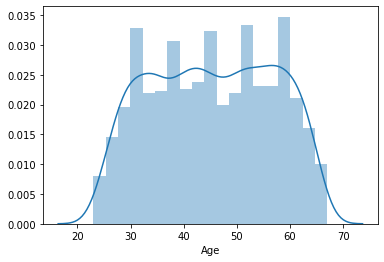

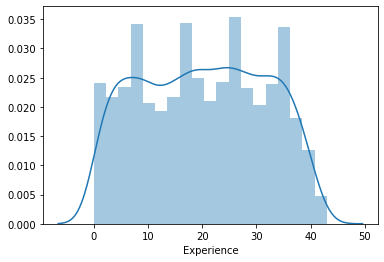

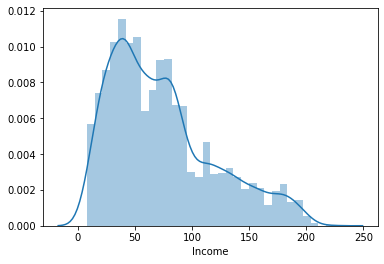

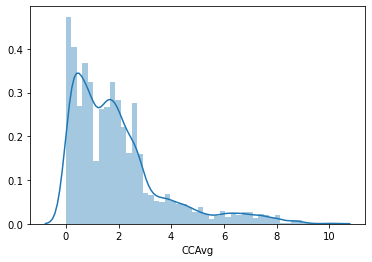

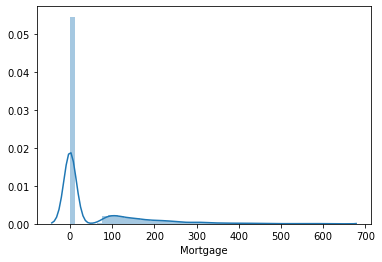

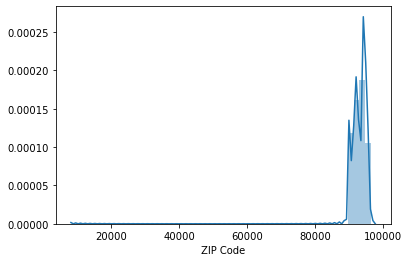

In [167]:
# Univariate and Bivariate
# Univariate: distribution plot

# # distplot for continous columns, ID is just an identifier so exluding
# for col in pdata.columns.values.tolist():
for col in ['Age','Experience','Income','CCAvg','Mortgage','ZIP Code']:
    sns.distplot(pdata[col])
    plt.show()




In [203]:
for col in ['Age','Experience','Income','CCAvg','Mortgage','ZIP Code']:
    print('Distribution of ', col,':', pdata[col].value_counts(normalize=True))

# age and experience is normal distribution but income, ccavg and mortgage is skewed
# 50% data is 0 mortgage value



Distribution of  Age : 35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64
Distribution of  Experience :  32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0.0284
 28    0.0276
 18    0.0274
 19    0.0270
 26    0.0268
 24    0.0262
 3     0.0258
 14    0.0254
 16    0.0254
 30    0.0252
 34    0.0250
 27    0.0250
 17    0.0250
 29    0.0248
 22    0.0248
 7     0.0242
 8     0.0238
 6     0.0238


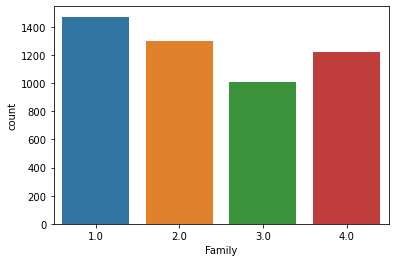

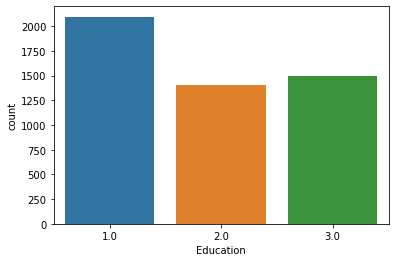

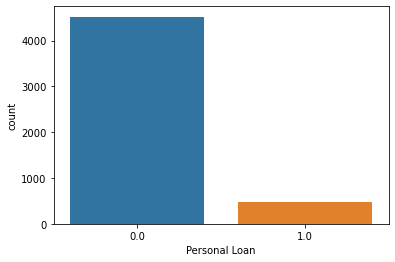

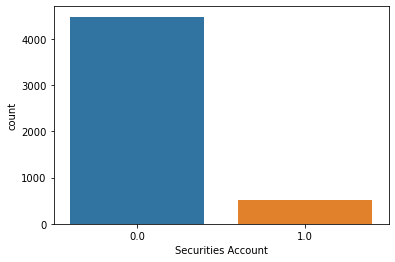

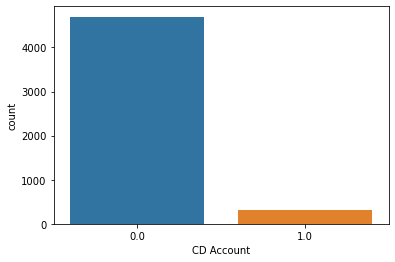

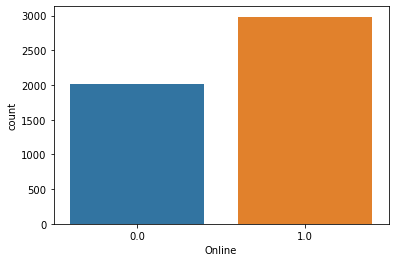

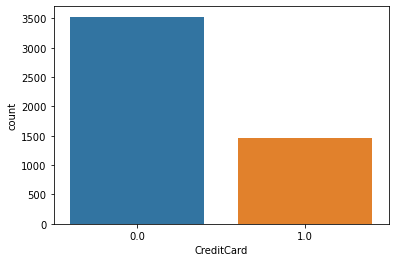

In [169]:
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(pdata[i])
    plt.show()



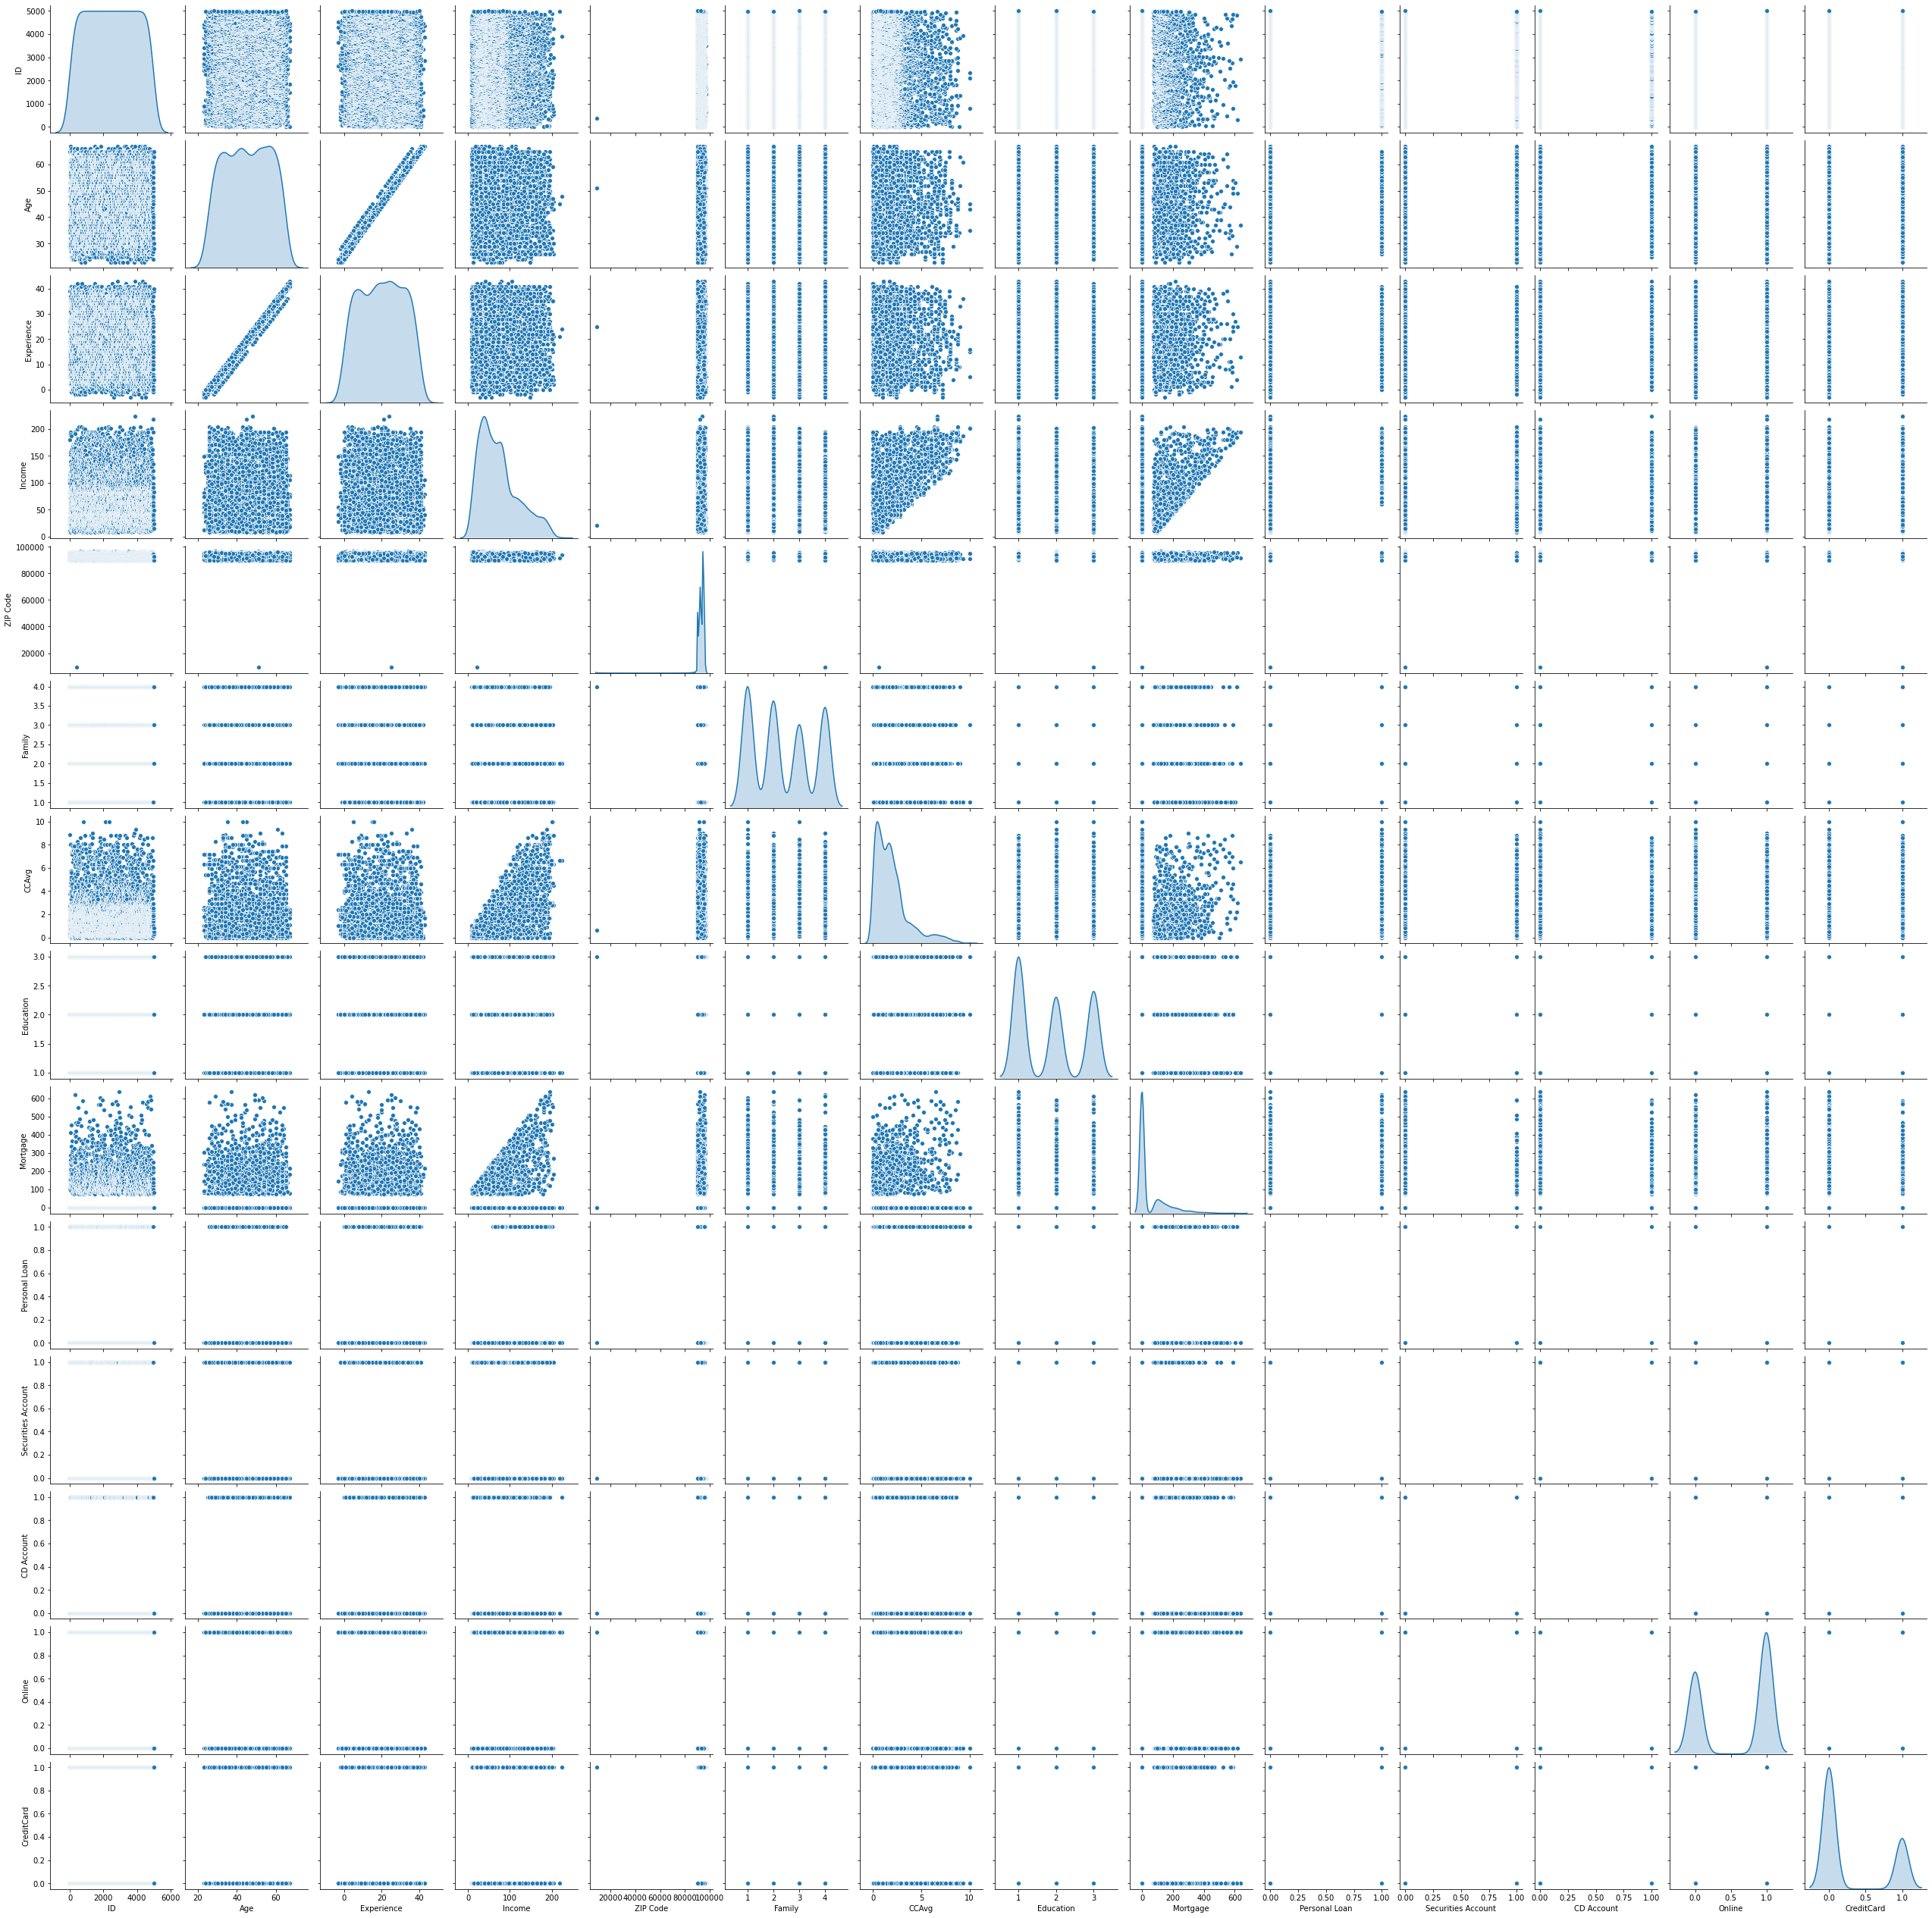

In [204]:
# Bivariate, pair plot. excluding ID column
sns.pairplot(pdata[1:],diag_kind='kde')
plt.show()

In [205]:
for x in ['Family','Education','CreditCard','Securities Account','CD Account','Online']:
    print('Relation between Personal Loan & ',x,' is :', pd.crosstab(pdata[x],pdata['Personal Loan'],normalize='index'))

Relation between Personal Loan &  Family  is : Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656
Relation between Personal Loan &  Education  is : Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576
Relation between Personal Loan &  CreditCard  is : Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279
Relation between Personal Loan &  Securities Account  is : Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943
Relation between Personal Loan &  CD Account  is : Personal Loan         0         1
CD Account                       
0       

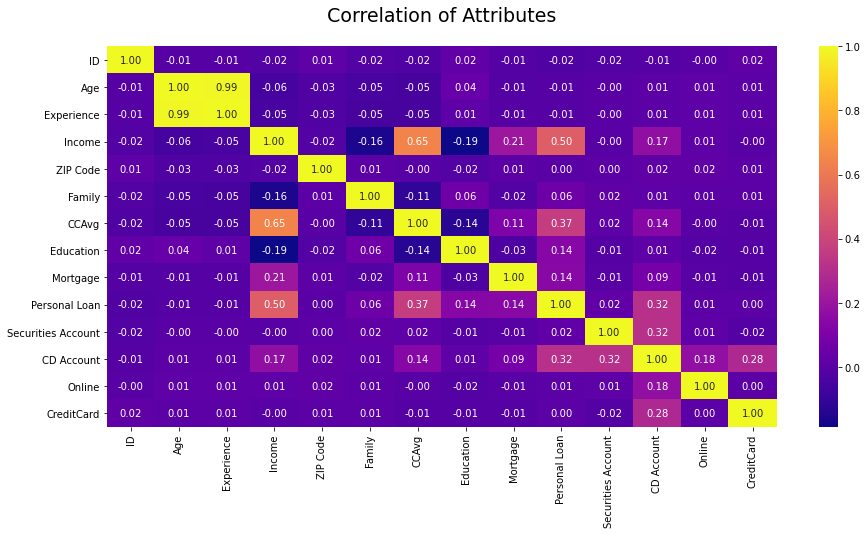

In [206]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(pdata.corr(), cmap='plasma',annot=True, fmt='.2f')



# Age and Experience are highly correlated and the correlation is almost 1.
# 'Income' and 'CCAvg' is moderately correlated.
# Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.


In [173]:
# As we have seen above 'ID' and 'ZIP Code' are also not relevant for our model building so we will drop it.


# Get data model ready
# change the attribute that has negative value, then change it to positive
# in the above we saw"Experience" with negative. Here we convert them to their absolute values


# pdata[pdata['Experience'] < 0]=  pdata[pdata['Experience'] < 0].abs()

# no more negative values
print((pdata < 0).any())

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


In [174]:
#Convert variable to a categorical variable wherever relevant
pdata['Family'] = pdata['Family'].astype('category')
pdata['Education'] = pdata['Education'].astype('category')
pdata['Personal Loan'] = pdata['Personal Loan'].astype('category')
pdata['Securities Account'] = pdata['Securities Account'].astype('category')

pdata['CD Account'] = pdata['CD Account'].astype('category')
pdata['Online'] = pdata['Online'].astype('category')
pdata['CreditCard'] = pdata['CreditCard'].astype('category')

#### 3. Split the data into training and test set in the ratio of 70:30 respectively (5marks)

In [207]:
# Split the data into training and testset in the ratio of 70:30 respectively
# As we have seen above 'ID' and 'ZIP Code' are also not relevant for our model building so we will drop it.

from sklearn.model_selection import train_test_split
pdata_new= pdata.drop(['ID','ZIP Code'],axis=1)
# pdata_new= pdata.drop(['ID'],axis=1)


In [208]:
X = pdata_new.drop(['Personal Loan'],axis=1)
print(X.head())




   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [209]:
# Predictor feature
Y = pdata_new['Personal Loan']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

print(x_train.head())

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1334   47          22      35       2    1.3          1         0   
4768   38          14      39       1    2.0          2         0   
65     59          35     131       1    3.8          1         0   
177    29           3      65       4    1.8          2       244   
4489   39          13      21       3    0.2          2         0   

      Securities Account  CD Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0  


#### 4. Use  Logistic  Regressionmodel  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance (15 marks)

          0         1         2         3         4         5         6  \
0 -0.463617  0.464147  0.046253  0.653871  0.148392  1.377912  0.000891   

          7         8         9        10  intercept  
0  0.061506  1.967988 -0.329937 -0.417056   -0.27577  
0.9426666666666667


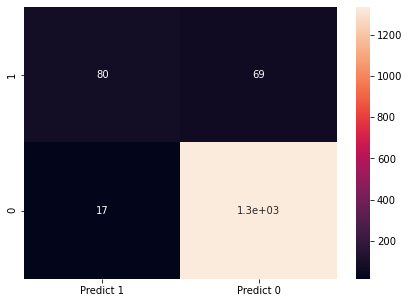

[[  80   69]
 [  17 1334]]


In [210]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)

# [[  83   66]
#  [  18 1333]]

# The confusion matrix
#
# True Positives (TP): 83
# True Negatives (TN): 1333
# False Positives (FP): 18
# False Negatives (FN): 66

In [211]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
# The precision is the ratio tp / (tp + fp)
# The recall is the ratio tp / (tp + fn)
# f1-score: 2*((precision*recall)/(precision+recall))


Training accuracy 0.95

Testing accuracy 0.9426666666666667

F1 score: 0.6504065040650406
Recall: 0.5369127516778524
Precision: 0.8247422680412371
Roc Auc Score: 0.7621647400136118


In [212]:
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### 5. Check different parameters  of  Logistic  Regression  and  give  your  reasoning whether  the modelperformance is affected due to it or not? (10 marks)

In [213]:
# Check different parameters  of  Logistic  Regression  and  give  your  reasoning whether  the modelperformance is affected due to it or not
print(model.get_params())

# using L2 penalty
train_score = []
test_score = []
roc=[]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C=0.75, solver=i)  # changing values of solver
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train), 3))
    test_score.append(round(model.score(x_test, y_test), 3))
    roc.append(round(roc_auc_score(y_test,y_predict),3))

print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print(roc)


# liblinear performs better than rest as training, testing accuracy and roc curve 

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.951, 0.952, 0.913, 0.908]

[0.948, 0.946, 0.945, 0.91, 0.908]

[0.78, 0.764, 0.772, 0.646, 0.629]


In [214]:
# using L1 penalty
train_score = []
test_score = []
roc=[]
solver = ['liblinear', 'saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l1', C=0.75, solver=i)  # changing values of solver
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train), 3))
    test_score.append(round(model.score(x_test, y_test), 3))
    roc.append(round(roc_auc_score(y_test,y_predict),3))

print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print(roc)


###############################################################################
## Highest accuracy is same 'l1' with 'liblinear' & 'l2' with 'newton-cg'
###############################################################################

['liblinear', 'saga']

[0.951, 0.908]

[0.945, 0.908]

[0.779, 0.629]


In [215]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print("Trainig accuracy",model.score(x_train,y_train))
print()
print("Testing accuracy",model.score(x_test, y_test))


# Trainig accuracy 0.9011428571428571

# Testing accuracy 0.8986666666666666
#### Testing accuracy decreased and model is not overfit anymore so NOT adding class weight from the model

Trainig accuracy 0.9022857142857142

Testing accuracy 0.8906666666666667


In [216]:
train_score = []
test_score = []
roc=[]
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
for i in C:
    model = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', C=i)  # changing values of C : removed class_weight='balanced',
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),
                             3))  # appending training accuracy in a blank list for every run of the loop
    test_score.append(
        round(model.score(x_test, y_test), 3))  # appending testing accuracy in a blank list for every run of the loop
    roc.append(round(roc_auc_score(y_test,y_predict),3))

print(C)
print()
print(train_score)
print()
print(test_score)
print(roc)


# [0.01, 0.1, 0.25, 0.5, 0.75, 1]

# [0.922, 0.948, 0.951, 0.95, 0.951, 0.952]

# [0.919, 0.943, 0.944, 0.945, 0.945, 0.947]
# [0.669, 0.753, 0.772, 0.776, 0.775, 0.782]

# Best result is obtained for C=0.5

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.923, 0.95, 0.952, 0.951, 0.951, 0.951]

[0.922, 0.943, 0.945, 0.947, 0.945, 0.945]
[0.679, 0.754, 0.772, 0.782, 0.779, 0.775]


Training accuracy 0.9508571428571428

Testing accuracy 0.9466666666666667

Confusion Matrix


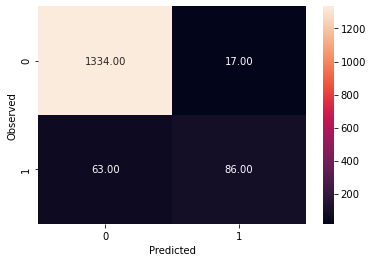

None

Recall: 0.5771812080536913

Precision: 0.8349514563106796

F1 Score: 0.6825396825396827

Roc Auc Score: 0.7822989682015311


In [217]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy",model.score(x_train,y_train))
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# new improved model:

# Trainig accuracy 0.9491428571428572

# Testing accuracy 0.9473333333333334  

# Recall: 0.5771812080536913

# Precision: 0.8349514563106796

# F1 Score: 0.6825396825396827

# Roc Auc Score: 0.7822989682015311


# Default model:

# F1 score: 0.6504065040650406
# Recall: 0.5369127516778524
# Precision: 0.8247422680412371
# Roc Auc Score: 0.7621647400136118


# The improved model gave bit better result than the default one.
# The accuracy for testing & training, recall, precision and ROC everything has improved a bit.
# but, yes the default model is pretty good in picking up the parameters

# {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 
#  'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None,
#  'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

#### 6. Give Business understanding of your model? (5 marks)


In [220]:
# Based on the accuracy, ~94% of the time the model will predict correct data

# True Positive (observed=1,predicted=1):
# Predicted likelihood of a liability customer buying personal loans
#
# False Positive (observed=0,predicted=1):
# Predicted that personal loan will be granted and the customer will not buy the loan
#
# True Negative (observed=0,predicted=0):
# Predicted that  loan will not be granted and the customer not buying loan
#
# False Negative (observed=1,predicted=0):
# Predicted that  loan will not be granted and the customer want the personal loan
#

# The precision is the ratio tp / (tp + fp)
# The recall is the ratio tp / (tp + fn)
# f1-score: 2*((precision*recall)/(precision+recall))
# tp: 86
# tn: 1334
# fn: 63
# fp: 17


# The aim of the Thera Bank is to convert there liability customers into loan customers.
# They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data


# Here the bank wants to give loan to the people who are eligible for the personal loan i.e. less number of False Positive,
# if FP is high bank would lose money but also needs to see that less false negative as well. So that the bank doesn't 
# loose customer here.
# Hence Precision as well as recall needs to be balanced is the important metric.
#
# After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict 
# who is eligible for personal loan.
# They can use the model for upcoming customers.